# 可选实验室：特征工程和多项式回归

![](../images/C1_W2_Lab07_FeatureEngLecture.PNG)

## 目标

在本实验室中，您将：

- 探索特征工程和多项式回归，它允许您使用线性回归机制来拟合非常复杂，甚至非常非线性的函数。

## 工具

您将利用之前实验室中开发的函数以及matplotlib和NumPy。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng

np.set_printoptions(precision=2)

# 特征工程和多项式回归概述

开箱即用的线性回归提供了一种构建以下形式的模型的方法：

$$f_{\mathbf{w},b}=w_0x_0+w_1x_1+\cdots+w_{n-1}x_{n-1}+b\tag{1}$$

如果您的特征/数据是非线性的或者是特征的组合怎么办？例如，房价往往与居住面积不成线性关系，而是对非常小或非常大的房屋不利，从而形成上图所示的曲线。我们如何使用线性回归机制来拟合这条曲线？回想一下，我们拥有的“机制”是能够修改（1）中的参数$\mathbf{w}$、$\mathbf{b}$以使方程“拟合”训练数据。然而，（1）中对$\mathbf{w}$、$\mathbf{b}$的任何调整都无法实现对非线性曲线的拟合。

## 多项式特征

上面我们考虑了数据非线性的场景。让我们尝试使用目前已知的知识来拟合非线性曲线。我们将从一个简单的二次方程开始：$y=1+x^2$

您熟悉我们使用的所有例程。它们可以在`lab_utils_multi.py`文件中查看。我们将使用[`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)，它是一个NumPy例程，用于沿列边界连接。

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


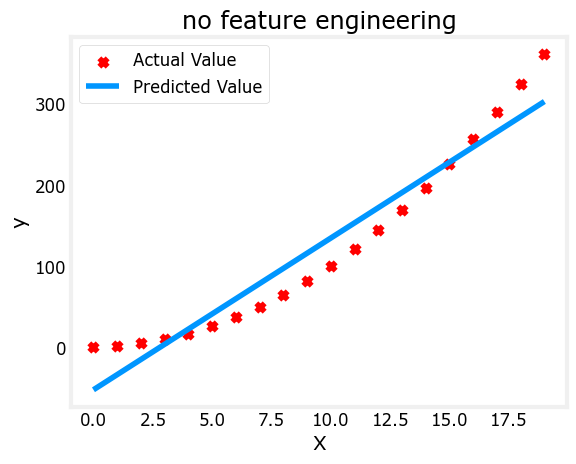

In [2]:
x = np.arange(0, 20, 1)
y = 1 + x ** 2
X = x.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("no feature engineering")
plt.plot(x, X * model_w + model_b, label="Predicted Value")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

嗯，正如预期的那样，不太合适。需要的是类似$y=w_0x_0^2+b$的东西，或者**多项式特征**。
为此，您可以修改*输入数据*以*设计*所需的功能。如果将原始数据与$x$值平方的版本交换，则可以实现$y= w_0x_0^2 + b$。我们来试试吧。将下面的`X`替换为`X**2`：

In [3]:
x = np.arange(0, 20, 1)
y = 1 + x ** 2
X = x ** 2

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


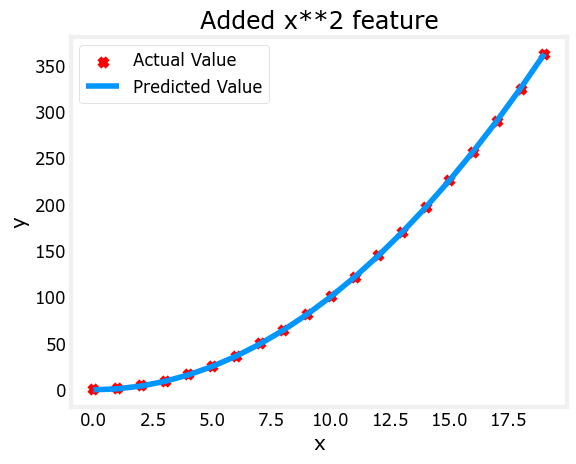

In [4]:
X = X.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-5)
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X, model_w) + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

伟大的！近乎完美契合。注意图形正上方打印的$\mathbf{w}$和$b$的值：`w,b found by gradient descent: w: [1.], b: 0.0490`。梯度下降将$\mathbf{w}$，$b$的初始值修改为`(1.0,0.049)`或$y=1*x_0^2+0.049$的模型，非常接近我们的目标$y=1*x_0^2+1$。如果你跑得更久，可能会是更好的匹配。

### 选择特征

上面，我们知道需要$x^2$项。需要哪些功能可能并不总是很明显。人们可以添加各种潜在的功能来尝试找到最有用的功能。例如，如果我们尝试：$y=w_0x_0+w_1x_1^2+w_2x_2^3+b$会怎么样？

运行下一个单元格。

In [5]:
x = np.arange(0, 20, 1)
y = x ** 2
X = np.c_[x, x ** 2, x ** 3]

Iteration         0, Cost: 1.14029e+03
Iteration     10000, Cost: 7.90568e+01
Iteration     20000, Cost: 1.62482e+01
Iteration     30000, Cost: 3.34903e+00
Iteration     40000, Cost: 6.99857e-01
Iteration     50000, Cost: 1.55758e-01
Iteration     60000, Cost: 4.39818e-02
Iteration     70000, Cost: 2.09930e-02
Iteration     80000, Cost: 1.62388e-02
Iteration     90000, Cost: 1.52295e-02
w,b found by gradient descent: w: [1.49e-01 9.76e-01 8.68e-04], b: 0.0187


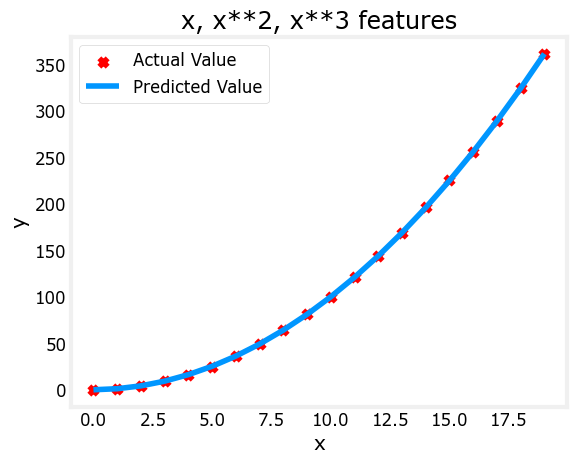

In [6]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-7)
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("x, x**2, x**3 features")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

注意$\mathbf{w}$的值，`[0.08 0.54 0.03]`和b是`0.0106`。这意味着拟合/训练后的模型是：

$$0.08x+0.54x^2+0.03x^3+0.0106$$

梯度下降通过相对于其他项增加$w_1$项来强调最适合$x^2$数据的数据。如果你要运行很长时间，它将继续减少其他条款的影响。
> 
>梯度下降通过强调其相关参数来为我们选择“正确”的特征

让我们回顾一下这个想法：

- 最初，这些功能被重新缩放，以便它们彼此具有可比性
- 较小的权重值意味着不太重要/正确的特征，并且在极端情况下，当权重变为零或非常接近零时，相关特征可用于将模型拟合到数据。
- 上面，拟合后，与$x^2$特征相关的权重比$x$或$x^3$的权重大得多，因为它在拟合数据时最有用。

### 另一种观点

上面，多项式特征是根据它们与目标数据的匹配程度来选择的。思考这个问题的另一种方法是注意，一旦我们创建了新特征，我们仍然使用线性回归。鉴于此，最佳特征将相对于目标呈线性。通过一个例子可以最好地理解这一点。

In [7]:
x = np.arange(0, 20, 1)
y = x ** 2
X = np.c_[x, x ** 2, x ** 3]
X_features = ['x', 'x^2', 'x^3']

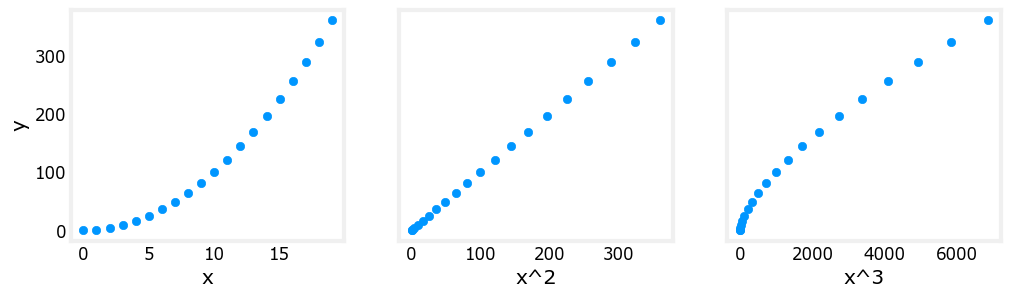

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

从上面可以看出，映射到目标值$y$的$x^2$特征是线性的。然后，线性回归可以使用该特征轻松生成模型。

### 缩放功能

正如上一个实验所述，如果数据集具有显着不同尺度的特征，则应该应用特征缩放来加速梯度下降。在上面的例子中，有$x$、$x^2$和$x^3$，它们自然会有非常不同的比例。让我们将Z-score标准化应用到我们的示例中。

In [9]:
x = np.arange(0, 20, 1)
X = np.c_[x, x ** 2, x ** 3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X, axis=0)}")
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X, axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


现在我们可以再次尝试使用更激进的$\alpha$值：

Iteration         0, Cost: 9.42147e+03
Iteration    100000, Cost: 1.84076e-11
Iteration    200000, Cost: 6.22427e-23
Iteration    300000, Cost: 1.21354e-24
Iteration    400000, Cost: 1.21354e-24
Iteration    500000, Cost: 1.21354e-24
Iteration    600000, Cost: 1.21354e-24
Iteration    700000, Cost: 1.21354e-24
Iteration    800000, Cost: 1.21354e-24
Iteration    900000, Cost: 1.21354e-24
w,b found by gradient descent: w: [1.35e-11 1.13e+02 2.16e-11], b: 123.5000


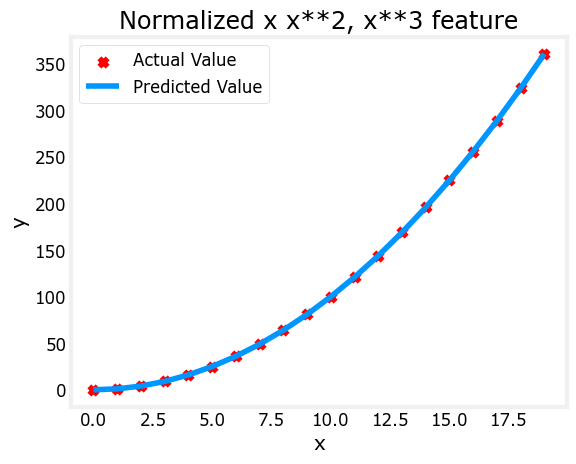

In [10]:
x = np.arange(0, 20, 1)
y = x ** 2
X = np.c_[x, x ** 2, x ** 3]
X = zscore_normalize_features(X)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha=1e-1)
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

特征缩放使得收敛速度更快。

再次注意$\mathbf{w}$的值。 $w_1$项（即$x^2$项）是最受强调的。梯度下降几乎消除了$x^3$项。

### 复杂函数

通过特征工程，甚至可以对相当复杂的函数进行建模：

Iteration         0, Cost: 2.24887e-01
Iteration   1000000, Cost: 5.41184e-03
Iteration   2000000, Cost: 3.91049e-03
Iteration   3000000, Cost: 3.70554e-03
Iteration   4000000, Cost: 3.58009e-03
Iteration   5000000, Cost: 3.46408e-03
Iteration   6000000, Cost: 3.35329e-03
Iteration   7000000, Cost: 3.24728e-03
Iteration   8000000, Cost: 3.14582e-03
Iteration   9000000, Cost: 3.04872e-03
w,b found by gradient descent: w: [-1.62e-01 -2.03e+01  5.29e+01 -1.55e+01 -3.27e+01 -2.37e+00  1.79e+01
 -3.07e-02 -7.51e-03  6.16e-02  1.25e-01 -1.01e-02  6.31e-02], b: -0.0073


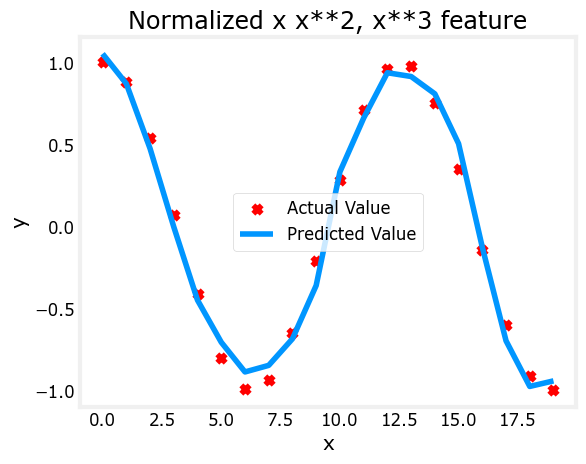

In [18]:
x = np.arange(0, 20, 1)
y = np.cos(x / 2)
X = np.c_[x, x ** 2, x ** 3, x ** 4, x ** 5, x ** 6, x ** 7, x ** 8, x ** 9, x ** 10, x ** 11, x ** 12, x ** 13]
X = zscore_normalize_features(X)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000000, alpha=1e-1)
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 恭喜！

在本实验室中，您：

- 了解线性回归如何使用特征工程对复杂甚至高度非线性的函数进行建模
- 认识到在进行特征工程时应用特征缩放很重要